**Download Data**

# **Loan Default Prediction Project**

**Problem Statement:**

A bank's consumer credit department aim to simplify the decision-making process for home eqity lines of credit to be accepted. To do this, they will adopt the Equity Credit Opportunity Act's guide lines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recemt applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).   

**Objective:**

Build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.

**Data Dictionary:**

● BAD: 1 = Client defaulted on loan, 0 = loan repaid

● LOAN: Amount of loan approved

● MORTDUE: Amount due on the existing mortgage

● VALUE: Current value of the property

● REASON: Reason for the loan request (HomeImp = home improvement, DebtCon= debt
consolidation which means taking out a new loan to pay off other liabilities and consumer
debts)

● JOB: The type of job that loan applicant has such as manager, self, etc.

● YOJ: Years at present job

● DEROG: Number of major derogatory reports (which indicates serious delinquency or late
payments).

● DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a
borrower does not make the minimum required payments 30 to 60 days past the day on
which the payments were due)

● CLAGE: Age of the oldest credit line in months

● NINQ: Number of recent credit inquiries

● CLNO: Number of existing credit lines

● DEBTINC: Debt-to-income ratio (all monthly debt payments divided by gross monthly income. This number is one of the ways lenders measure a borrower’s ability to manage the monthly payments to repay the money they plan to borrow)

# Library

In [ ]:

import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
sns.set_style('dark')

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/hmeq (1).csv")

In [ ]:
original = data.copy() #Keep the original data

In [ ]:
data_sep = data.copy()

**Examine Data**

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [ ]:
data.shape # There are 5,960 rows and 13 columns

(5960, 13)

In [ ]:
data.info()
# Reason and Job = categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [ ]:
missing_check(data)

,Total,Percent
DEBTINC,1267,0.212584
DEROG,708,0.118792
DELINQ,580,0.097315
MORTDUE,518,0.086913
YOJ,515,0.086409
NINQ,510,0.085570
CLAGE,308,0.051678
JOB,279,0.046812
REASON,252,0.042282
CLNO,222,0.037248


**Observation**
- There are missing values in the dataset
- BAD and LOAN columns do not contain any missing values
- We will fill the NA with Mean (for numerical data) and Mode (for Categorical data) after EAD

In [ ]:
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


**Observation**

1. The average amount of loan approval is $18,607

2. The average current value of property is $101,776

3. The average year at present job is 8.92 years

4. The average number of existing credit lines is 21.2 lines

5. The average number of delinquent credit lines, major derogatory, and number of recent credit inquires are very low - which means that most clients in this dataset have a pretty good crefitibility through the loan approval process. However, there are still defaulted clients.

In [ ]:
# Making a list of all categorical variables
cat_col = data.select_dtypes(['object']).columns.tolist()
cat_col.append("BAD")

In [ ]:
cat_col

['REASON', 'JOB', 'BAD']

In [ ]:
# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
--------------------------------------------------
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
--------------------------------------------------
0    0.800503
1    0.199497
Name: BAD, dtype: float64
--------------------------------------------------


**Observation**

1. About 68% of the loans are borrowed by the customers for debt consolidation and anout 31% of the loans are borrowed by the customers for home improvement

2. The loans are borrowed by people with different kind of jobs

3. About 80% of the clients paid back the loan and about 19% of the clients defaulted on loan

**Exploratory Data Analysis - Numerical Data**

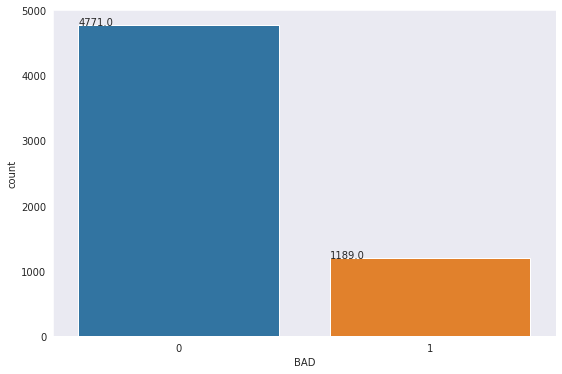

In [ ]:
plt.figure(figsize = (9, 6))

ax = sns.countplot(x = 'BAD', data = data)

# Annotating the exact count on the top of the bar for each category
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+ 0.35))

From 5,960 person who were approved for the loan:
- 4,771 person have paid back the loan
- 1,189 person have defaulted

In [ ]:
print('Skew :',round(data.skew(), 2))

Skew : BAD        1.50
LOAN       2.02
MORTDUE    1.81
VALUE      3.05
YOJ        0.99
DEROG      5.32
DELINQ     4.02
CLAGE      1.34
NINQ       2.62
CLNO       0.78
DEBTINC    2.85
dtype: float64


In [ ]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

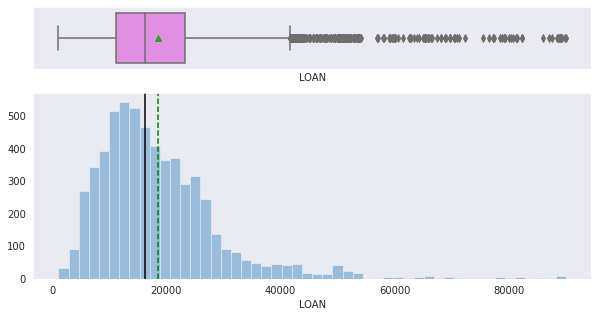

In [ ]:
histogram_boxplot(data['LOAN'])

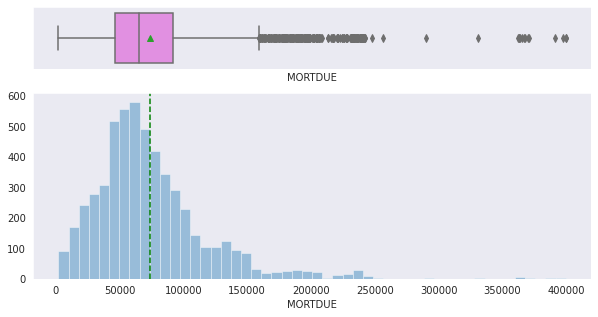

In [ ]:
histogram_boxplot(data['MORTDUE'])

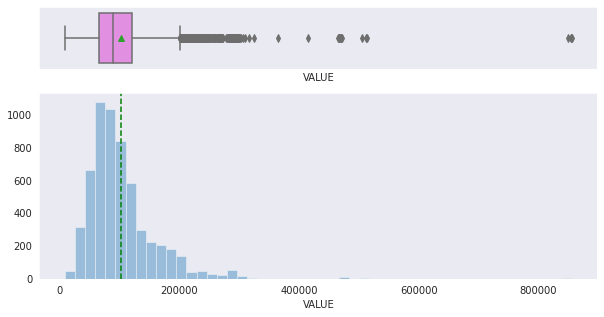

In [ ]:
histogram_boxplot(data['VALUE'])

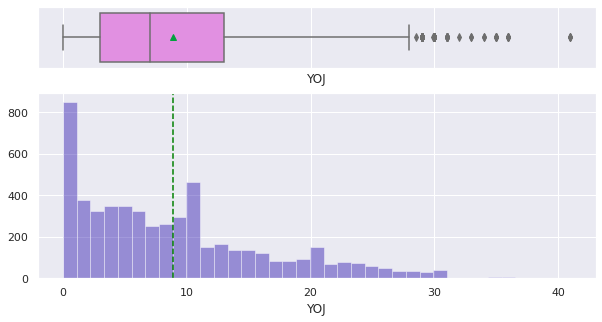

In [ ]:
histogram_boxplot(data['YOJ'])

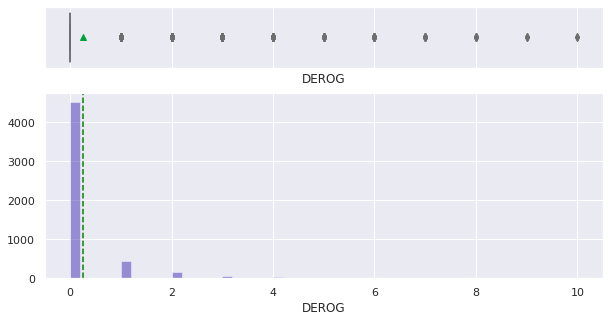

In [ ]:
histogram_boxplot(data['DEROG'])

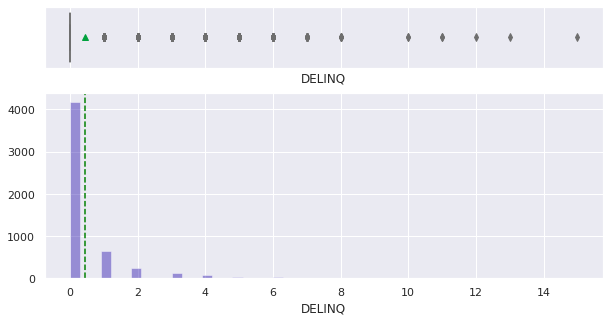

In [ ]:
histogram_boxplot(data['DELINQ'])

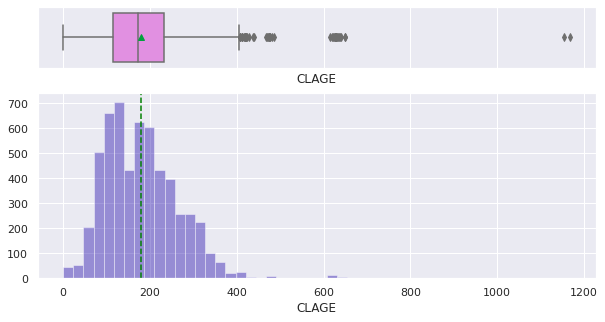

In [ ]:
histogram_boxplot(data['CLAGE'])

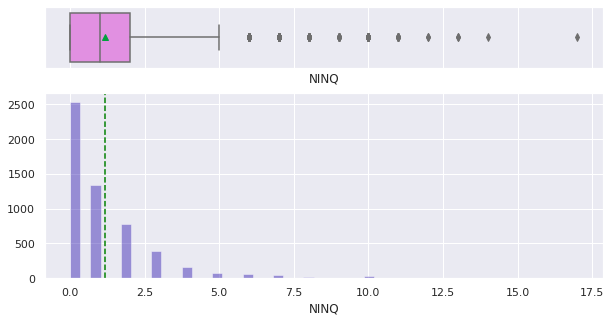

In [ ]:
histogram_boxplot(data['NINQ'])

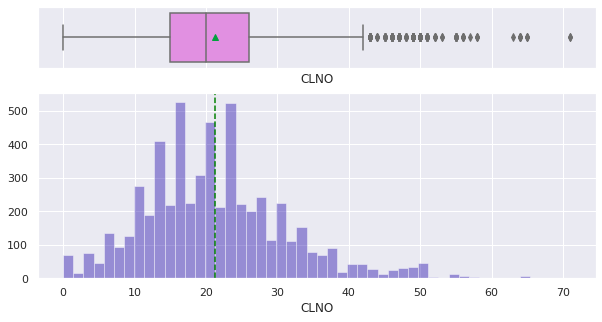

In [ ]:
histogram_boxplot(data['CLNO'])

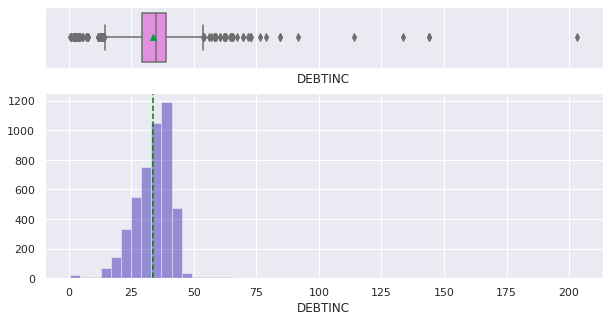

In [ ]:
histogram_boxplot(data['DEBTINC'])

**Observation**

1. There are a lot of outliers, especially in "NINQ", "CLAGE", "DELINQ", and "DEROG" columns - we will have to address this issue before building a model

2. Most data are skewed right

**Exploratory Data Analysis - Categorical Data**

In [ ]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

    plt.show()

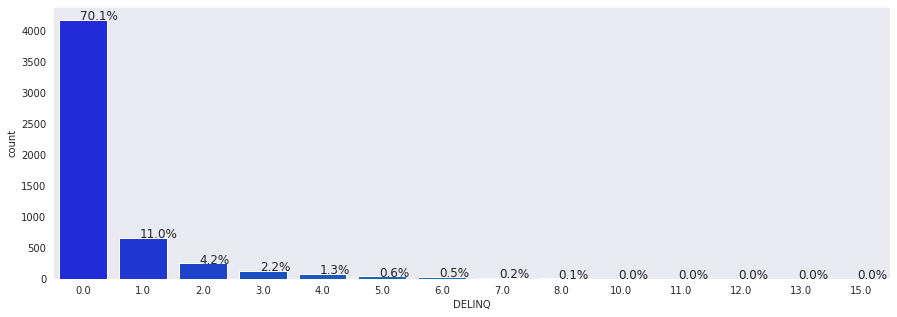

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

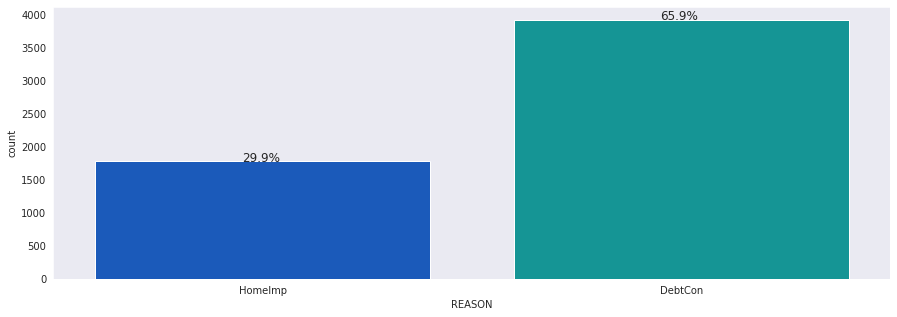

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

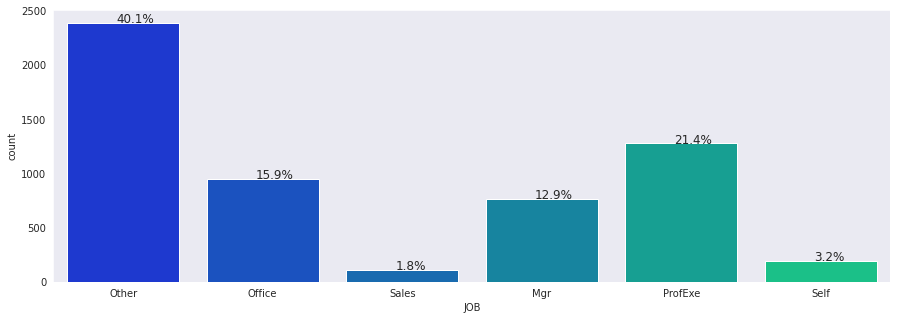

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Exploratory Data Analysis - Bivariate Analysis**

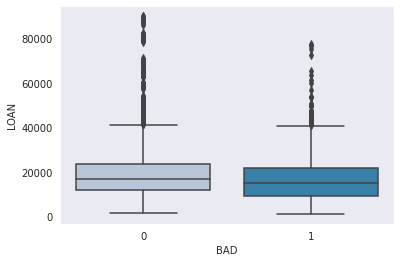

In [ ]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

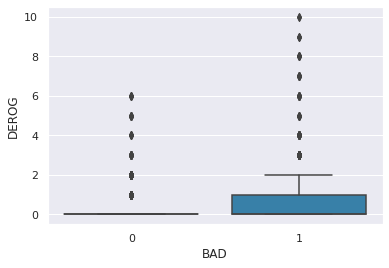

In [ ]:
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")

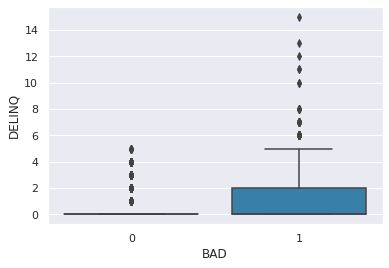

In [ ]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")

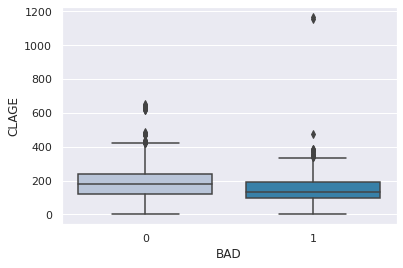

In [ ]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

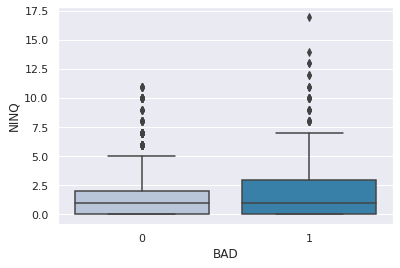

In [ ]:
sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu")

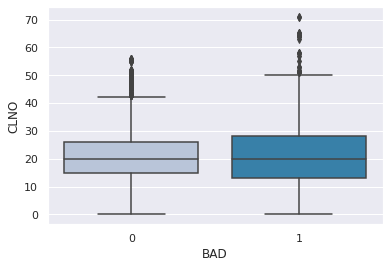

In [ ]:
sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")

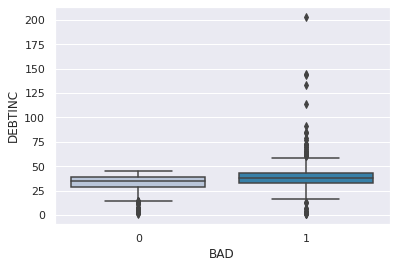

In [ ]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

Note on DEBTINC:
The lower = the better

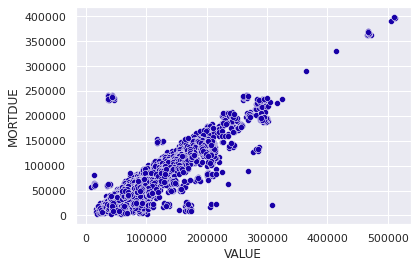

In [ ]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

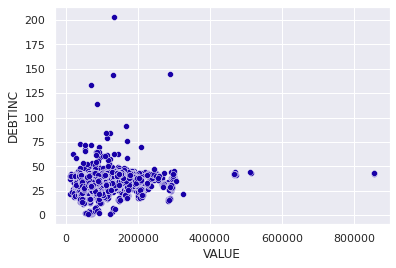

In [ ]:
sns.scatterplot(data["VALUE"],data['DEBTINC'],palette="PuBu")

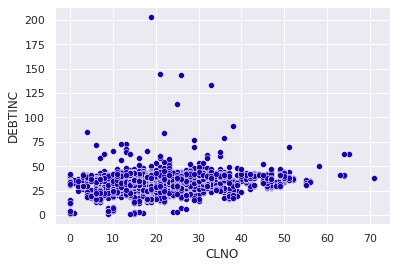

In [ ]:
sns.scatterplot(data["CLNO"],data['DEBTINC'],palette="PuBu")

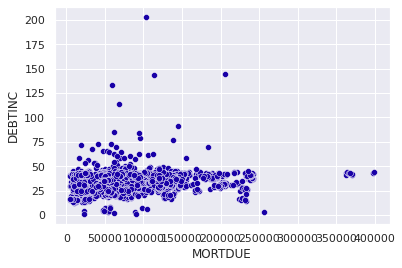

In [ ]:
sns.scatterplot(data["MORTDUE"],data['DEBTINC'],palette="PuBu")

In [ ]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


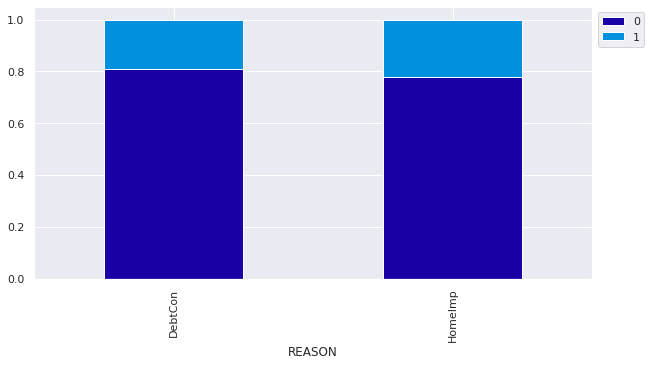

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Observation**

1. From statistical data, people who borrowed money for home improvement are more likely to default on loan

2. However the propotion of people who defaulted on loan between debt consolidation and home improvement reasons is not dramatically different

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


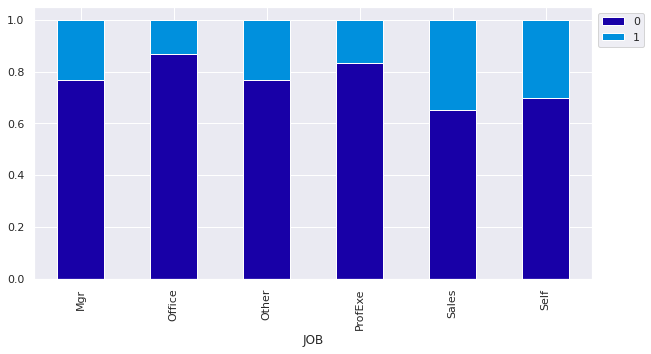

In [ ]:
stacked_plot(data['JOB'])

**Observation**

1. People who works at sales has the highest proportion of defaluting on loan

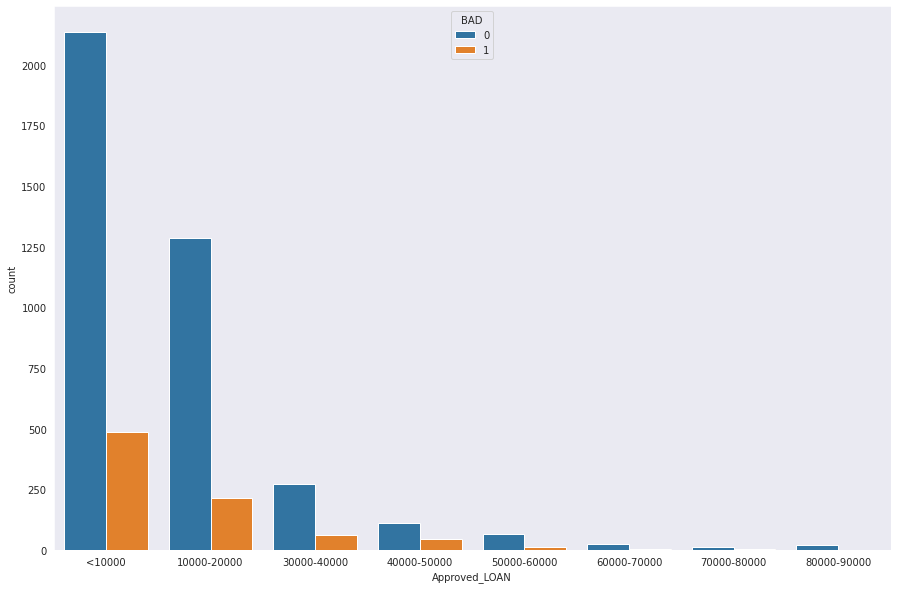

In [ ]:
# To see the trend of data for BAD and LOAN - let's categorize the amount of approved loan
data_sep["Approved_LOAN"] = data_sep["LOAN"]

bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, np.inf]

names = ['<10000', '10000-20000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000']

data_sep['Approved_LOAN'] = pd.cut(data_sep['LOAN'], bins, labels = names)

#Plot
plt.figure(figsize = (15, 10))

sns.countplot(x = 'Approved_LOAN', hue = 'BAD', data = data_sep)

plt.show() # 0 = paid back the loan & 1 != paid back the loan

**Observation**
1. People who were approved for loan less than 10,000 have the highest proportion of defaulting on loan

2. From the chart, it seems like the less approval amount of loan, the more chance that clients become a defaulter

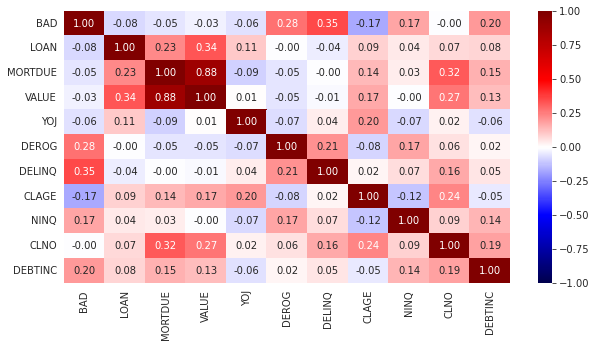

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize = (10, 5))
sns.heatmap(
    data[numerical_col].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "seismic"
)
plt.show()

**Observation**

1. High positive correlation between VALUE (current value of property) and MORTDUE (amount due on the existing mortgage)

2. Positive correlation between LOAN and VALUE, MORTDUE and CLNO, VALUE and CLNO, and BAD and DELINQ

3. There is no significant negative correlation between variables in this dataset

<Figure size 360x360 with 0 Axes>

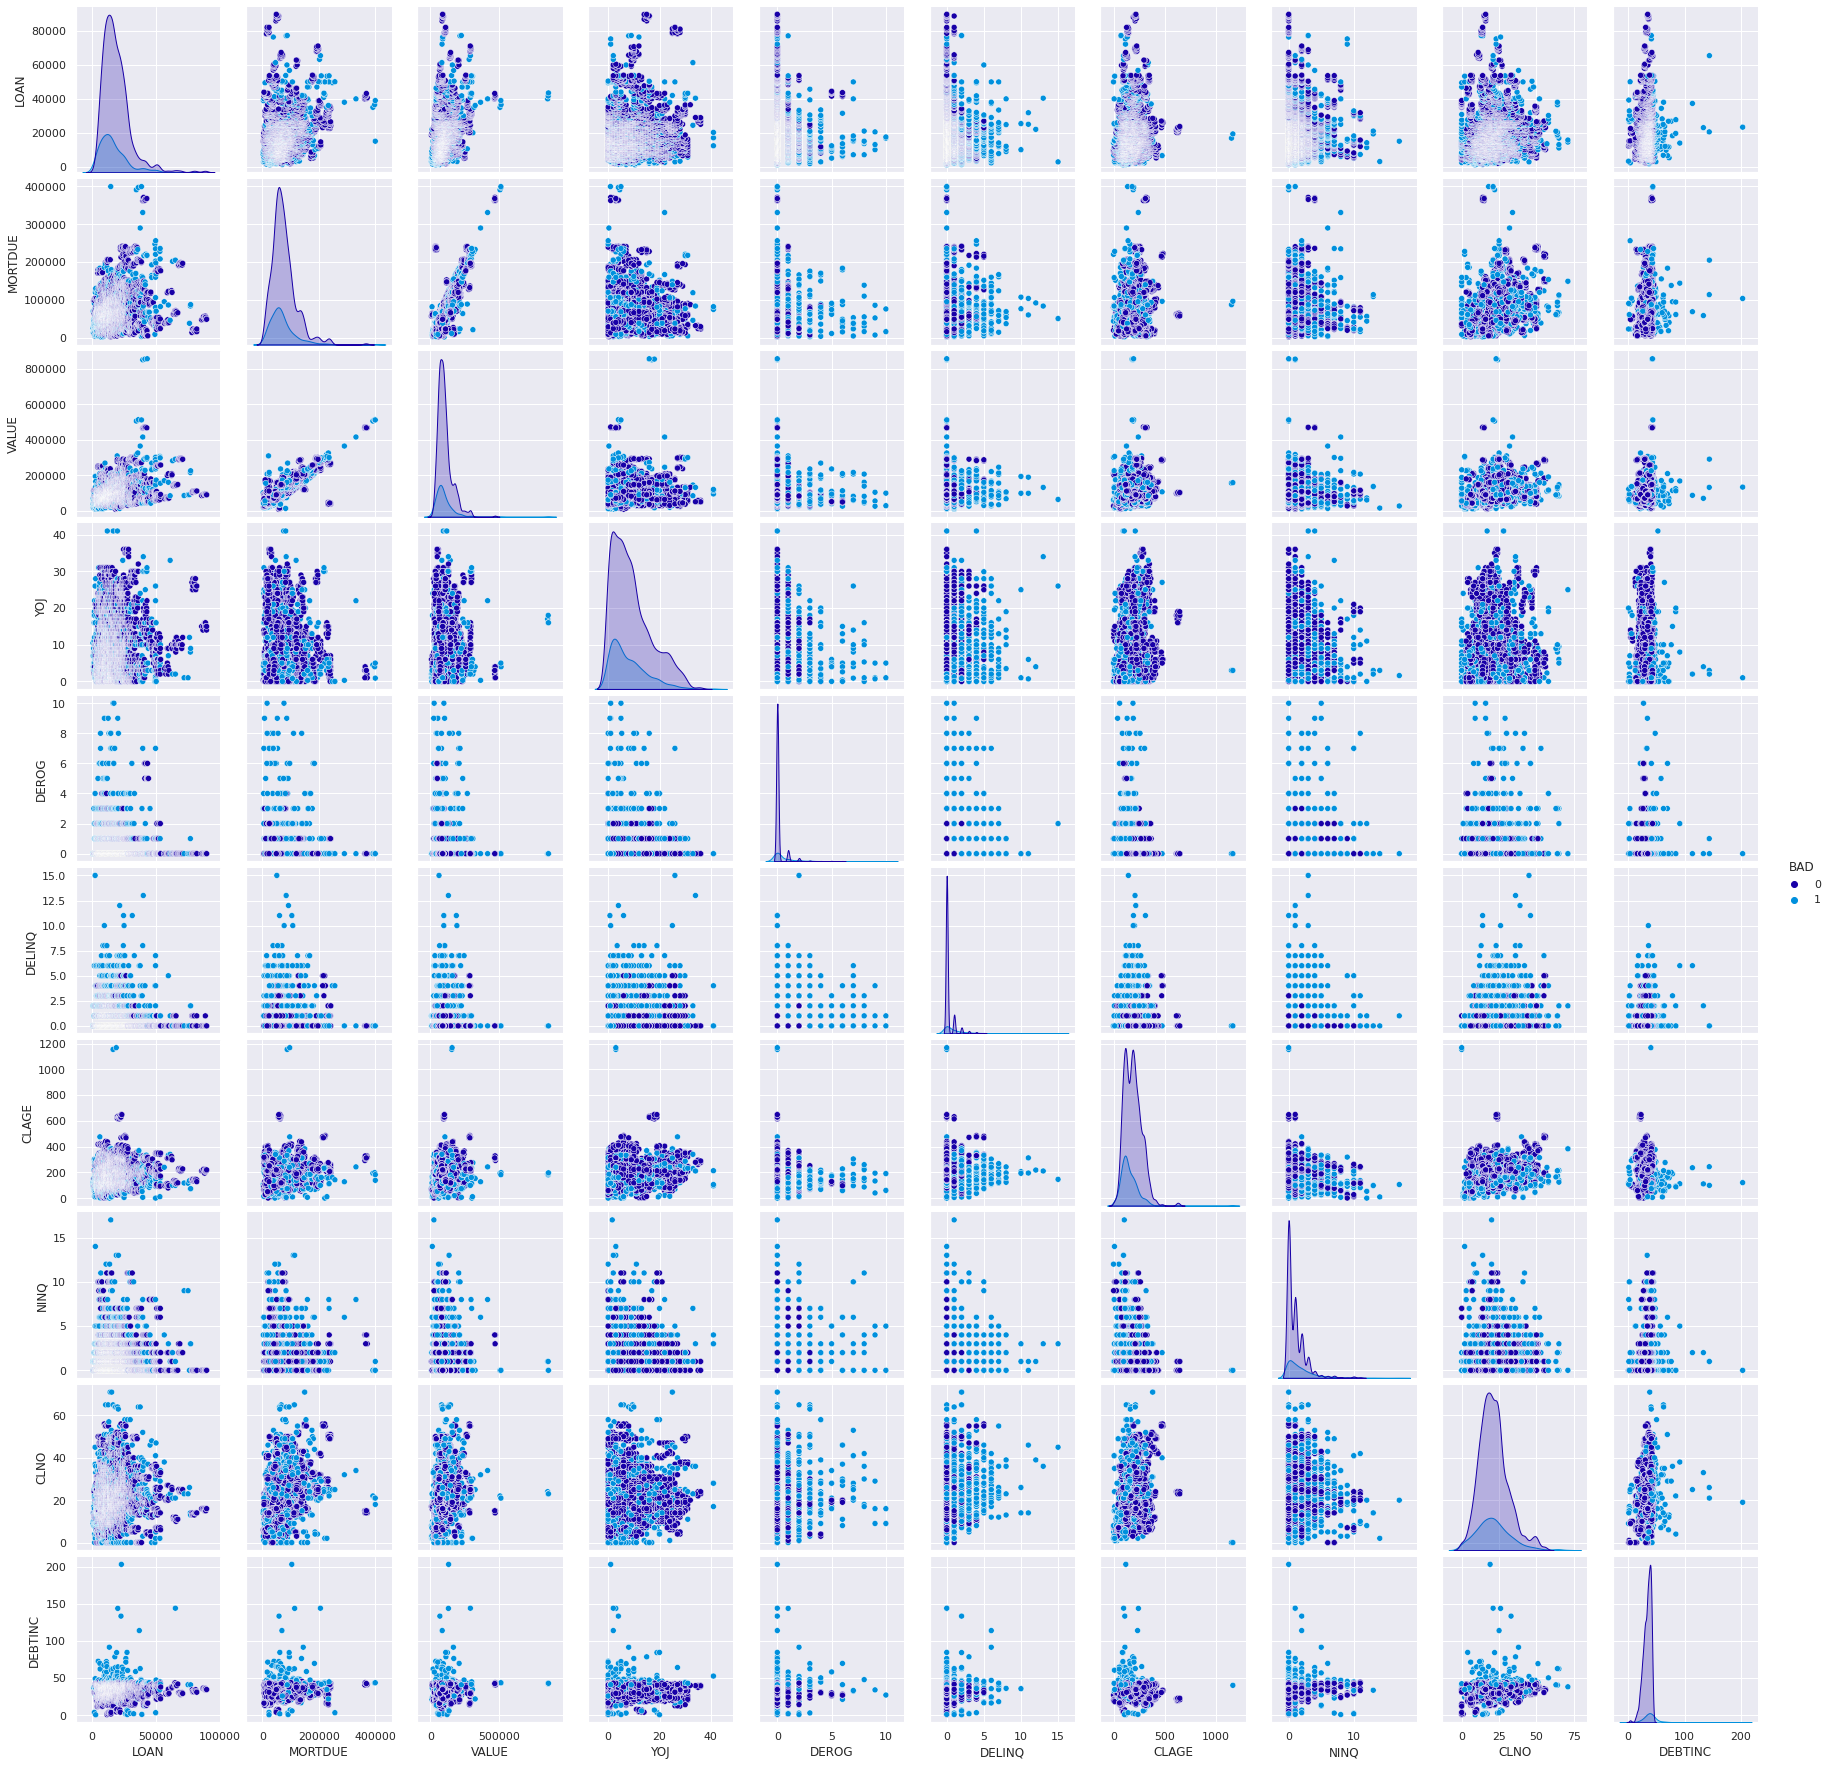

In [ ]:
plt.figure(figsize = (5, 5))
sns.pairplot(data = data, vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'], hue = 'BAD')
plt.show()

**Treating Outliers**
1. Detecting outliers using the Inter Quantile Range(IQR)
2. Treating outliers using Imputation techniques

In [ ]:
#Create list of numerical data
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [ ]:
#We will keep the original data = data and new data = df in order to compare and contrast
df = data.copy()

In [ ]:
#Remove "BAD" columns from the list
num_col.remove('BAD')
print(num_col)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [ ]:
#Detecting outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(df[num_col])

print("number of outliers:" + str(len(outliers)))

print("max outlier value:" + str(outliers.max()))

print("min outlier value:" + str(outliers.min()))

outliers

number of outliers:5960
max outlier value:LOAN        89900.000000
MORTDUE    399550.000000
VALUE      855909.000000
YOJ            41.000000
DEROG          10.000000
DELINQ         15.000000
CLAGE        1168.233561
NINQ           17.000000
CLNO           71.000000
DEBTINC       203.312149
dtype: float64
min outlier value:LOAN        41700.000000
MORTDUE    159500.000000
VALUE      200459.000000
YOJ            28.500000
DEROG           1.000000
DELINQ          1.000000
CLAGE         407.261167
NINQ            6.000000
CLNO           43.000000
DEBTINC         0.524499
dtype: float64


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5955,88900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5956,89000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,89200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,89800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Treating the outliers
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           )
       )

   return df

In [ ]:
df[num_col] = impute_outliers_IQR(df[num_col])

df.describe()[num_col]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,17064.318837,67887.745209,93138.805855,8.554321,0.035141,0.100331,176.752614,0.969529,20.223570,33.777010
std,7799.087290,32244.494912,37873.555955,7.000119,0.087821,0.187172,77.750646,1.171954,8.396237,6.571347
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.370986
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.413550
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.698162
75%,21900.000000,85352.750000,112136.750000,12.600000,0.000000,0.000000,228.920320,2.000000,25.000000,38.910151
max,41600.000000,159000.000000,200339.000000,28.000000,0.254570,0.449442,405.867848,5.000000,42.000000,53.584883


Check the result, plese note that:
1. data = original dataset (has outliers)
2. df = new dataset that we have treated outliers, using imputation technique

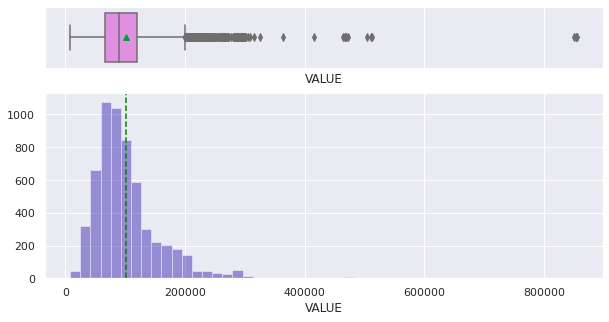

In [ ]:
#From "data" dataset
histogram_boxplot(data['VALUE'])

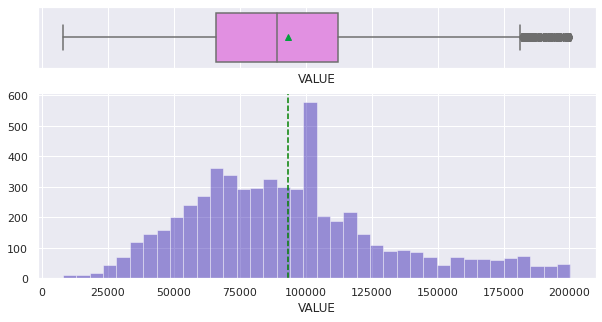

In [ ]:
#from "df" dataset
histogram_boxplot(df['VALUE'])

**Missing Value**

On the same dataset (df) - we will fill the missing valuable with Mean (for numerical data) and Mode (for categorical data)

In [ ]:
df[numerical_col] = df[numerical_col].fillna(df[numerical_col].median())

In [ ]:
df["JOB"] = df["JOB"].fillna(df["JOB"].mode()[0])
df["REASON"] = df["REASON"].fillna(df["REASON"].mode()[0])

In [ ]:
#Checking the percentages of missing value for each column
missing_check(df)

,Total,Percent
BAD,0,0.0
LOAN,0,0.0
MORTDUE,0,0.0
VALUE,0,0.0
REASON,0,0.0
JOB,0,0.0
YOJ,0,0.0
DEROG,0,0.0
DELINQ,0,0.0
CLAGE,0,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,17064.318837,7799.087290,1100.000000,11100.000000,16300.000000,21900.000000,41600.000000
MORTDUE,5960.0,67638.414669,30821.772531,2063.000000,48139.000000,65019.000000,82697.250000,159000.000000
VALUE,5960.0,93065.455140,37519.693618,8000.000000,66489.500000,89235.500000,111415.750000,200339.000000
YOJ,5960.0,8.420013,6.705035,0.000000,3.000000,7.000000,12.000000,28.000000
DEROG,5960.0,0.030967,0.083219,0.000000,0.000000,0.000000,0.000000,0.254570
DELINQ,5960.0,0.090567,0.180299,0.000000,0.000000,0.000000,0.000000,0.449442
CLAGE,5960.0,176.582804,75.718153,0.000000,117.371430,173.466667,224.284001,405.867848
NINQ,5960.0,0.972136,1.120714,0.000000,0.000000,1.000000,1.186055,5.000000
CLNO,5960.0,20.215242,8.238462,0.000000,15.000000,20.000000,25.000000,42.000000


**Model Building**

In [ ]:
X = df.drop(columns = 'BAD')
y = df['BAD']

In [ ]:
X = pd.get_dummies(X, drop_first = True)

In [ ]:
#Spliting the data into train and test for 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
print("Shape of the training set:", X_train.shape)
print("Shape of the test set:", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set: (4172, 16)
Shape of the test set: (1788, 16)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


**Model Evaluation**

Model can provide wrong prediction:
1. Predicting that the clients will not pay back the loan, but, in reality, the clients will pay back the loan
2. Predicting that the clients will pay back the loan, but, in reality, the clients will not pay back the loan

In [ ]:
#Function to print the classification report and get confusion matrix in a proper format - Might need to fix this on the label

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Defaulted', 'Defaulted'], yticklabels = ['Not Defaulted', 'Defaulted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

**Decision Tree**

In [ ]:
# Fitting the decision tree classifier on the training data
decision =  DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 7)

decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



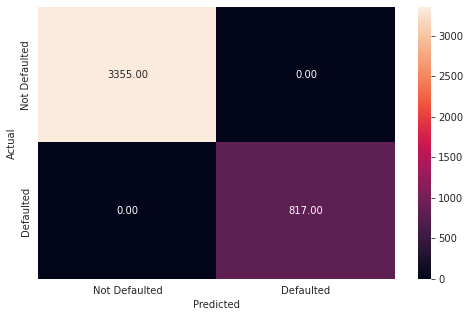

In [ ]:
#Performance for the training data
y_predict_train1 = decision.predict(X_train)
metrics_score(y_train, y_predict_train1)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1416
           1       0.65      0.62      0.63       372

    accuracy                           0.85      1788
   macro avg       0.78      0.76      0.77      1788
weighted avg       0.85      0.85      0.85      1788



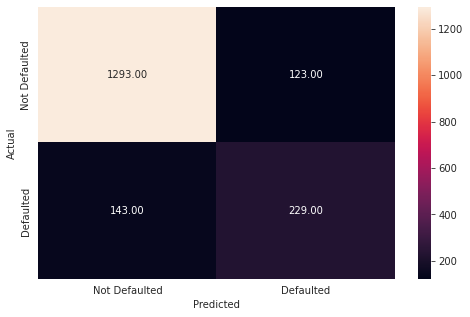

In [ ]:
#Performance for the testing data
y_predict_test1 = decision.predict(X_test)
metrics_score(y_test, y_predict_test1)

In [ ]:
decision_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(decision_tuned , parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

decision_tuned = grid_obj.best_estimator_

decision_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=4,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3355
           1       0.61      0.77      0.68       817

    accuracy                           0.86      4172
   macro avg       0.78      0.82      0.79      4172
weighted avg       0.88      0.86      0.86      4172



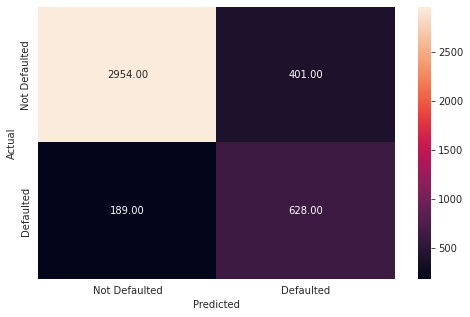

In [ ]:
#Performance for training data [after tuned]
y_predict_train2 = decision_tuned.predict(X_train)
metrics_score(y_train, y_predict_train2)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1416
           1       0.62      0.73      0.67       372

    accuracy                           0.85      1788
   macro avg       0.77      0.81      0.79      1788
weighted avg       0.86      0.85      0.85      1788



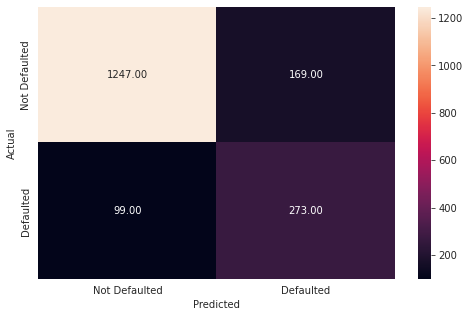

In [ ]:
#Performance for testing data [after tuned]
y_predict_test2 = decision_tuned.predict(X_test)
metrics_score(y_test, y_predict_test2)

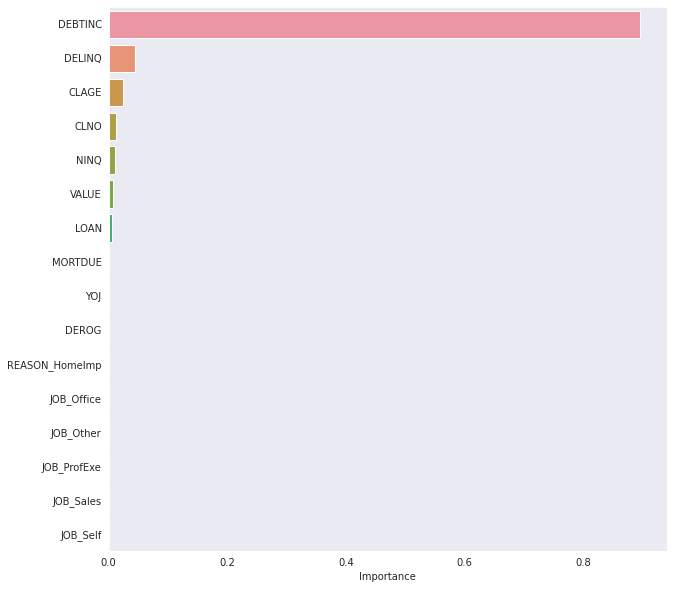

In [ ]:
#See the important features
importances = decision_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 10))

sns.barplot(importance_df.Importance,importance_df.index)

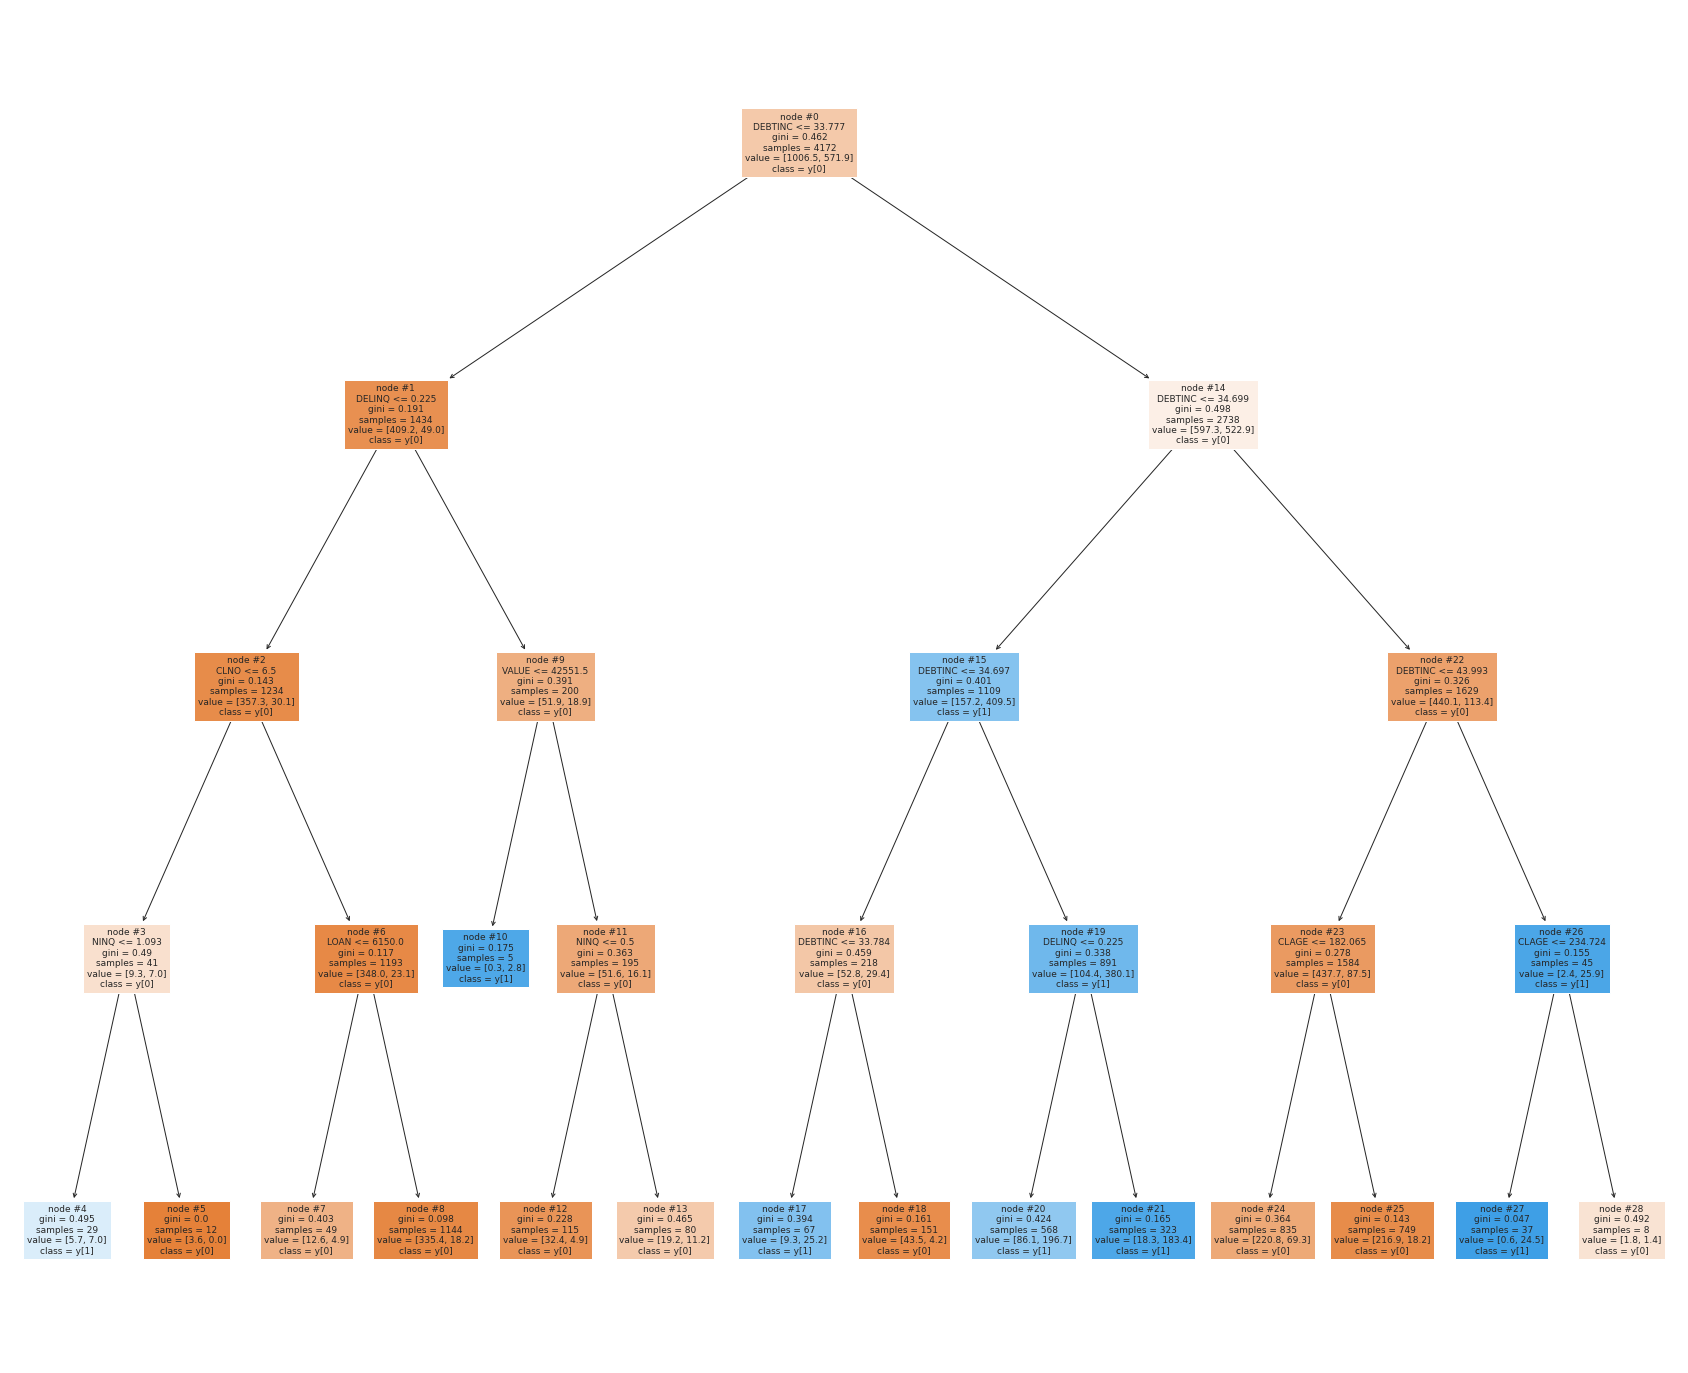

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 25))

tree.plot_tree(decision_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [ ]:
print (pd.DataFrame(decision_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                     Imp
DEBTINC         0.895886
DELINQ          0.043964
CLAGE           0.024601
CLNO            0.012305
NINQ            0.010482
VALUE           0.007671
LOAN            0.005090
MORTDUE         0.000000
YOJ             0.000000
DEROG           0.000000
REASON_HomeImp  0.000000
JOB_Office      0.000000
JOB_Other       0.000000
JOB_ProfExe     0.000000
JOB_Sales       0.000000
JOB_Self        0.000000


**Random Forest**

In [ ]:
rf_estimator =RandomForestClassifier(class_weight = {0 : 0.3, 1 : 0.7}, random_state = 7)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



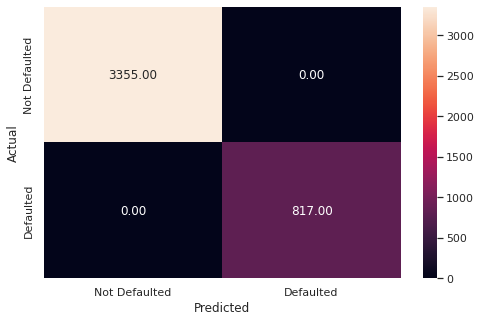

In [ ]:
#Performance for training data
y_predict_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_predict_train3)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1416
           1       0.90      0.63      0.74       372

    accuracy                           0.91      1788
   macro avg       0.91      0.81      0.84      1788
weighted avg       0.91      0.91      0.90      1788



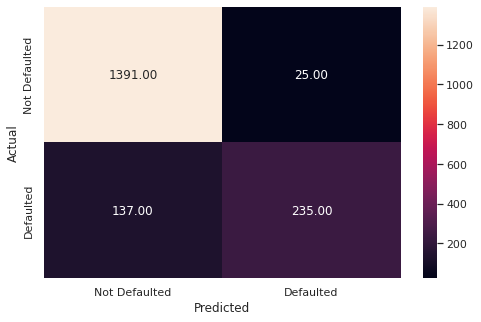

In [ ]:
# Checking performance on the testing data
y_predict_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_predict_test3)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



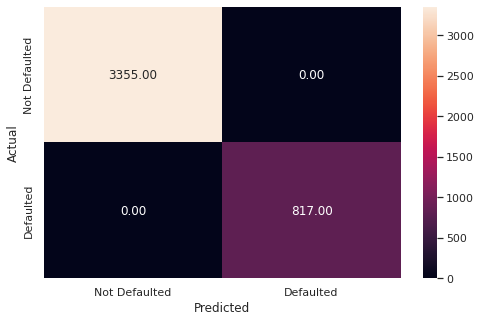

In [ ]:
#Performance for training data
y_predict_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_predict_train4)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.89      0.66      0.76       372

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



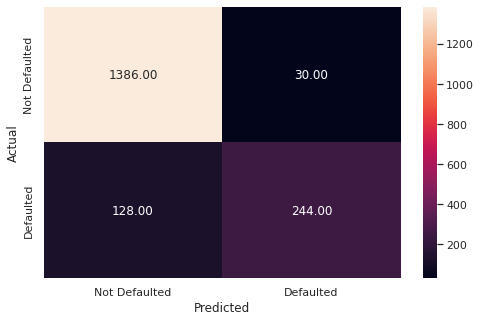

In [ ]:
#Performance for Testing data
y_predict_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_predict_test4)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv =5)

grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3355
           1       0.61      0.79      0.69       817

    accuracy                           0.86      4172
   macro avg       0.78      0.83      0.80      4172
weighted avg       0.88      0.86      0.87      4172



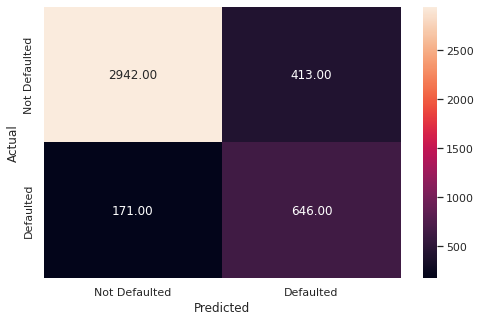

In [ ]:
#Performance for training score
y_predict_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_predict_train5)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1416
           1       0.63      0.76      0.69       372

    accuracy                           0.86      1788
   macro avg       0.78      0.82      0.80      1788
weighted avg       0.87      0.86      0.86      1788



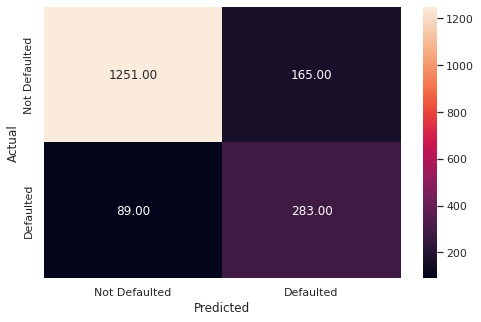

In [ ]:
#Performance for testing score
y_predict_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_predict_test5)

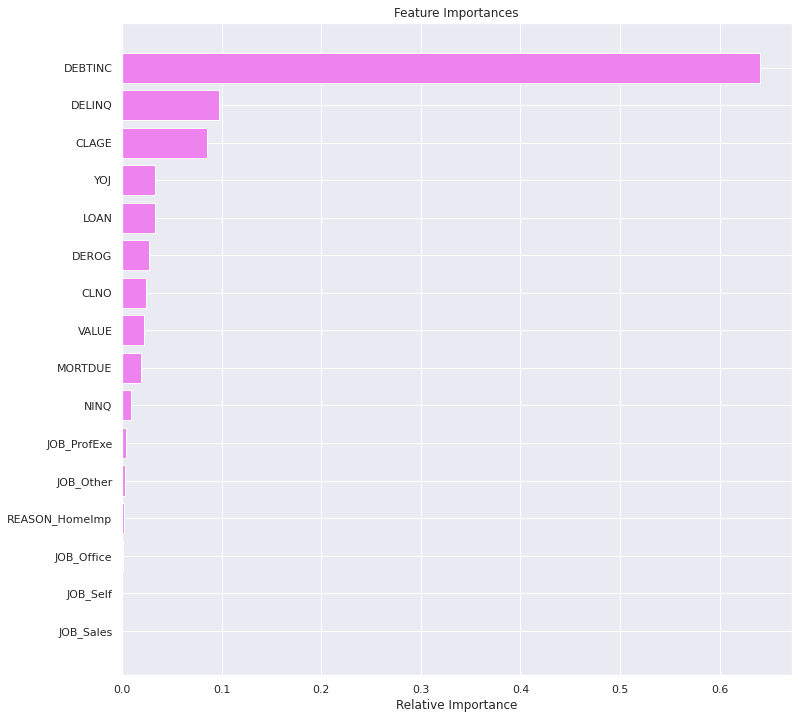

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

List of Model Name:
1. Decision tree = 'decision'
2. Decision tree [tuned] = 'decision_tuned'
3. Random Forest = 'rf_estimator'
4. Random Forest = 'rf_estimator_tuned'  

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [ ]:
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [ ]:
models = [decision, decision_tuned, rf_estimator, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['decision', 'decision_tuned', 'rf_estimator', 'rf_estimator_tuned'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,decision,1.000000,0.851230,1.000000,0.615591,1.000000,0.650568
1,decision_tuned,0.858581,0.850112,0.768666,0.733871,0.610301,0.617647
2,rf_estimator,1.000000,0.909396,1.000000,0.631720,1.000000,0.903846
3,rf_estimator_tuned,0.860019,0.857942,0.790698,0.760753,0.610009,0.631696


**Interpretation from the score table:**

- Since the score from the random forest model indicates strong important score for the Debt-to-income, DELINQ, and CLAGE variables, we will be focusing on analyzing these variables

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


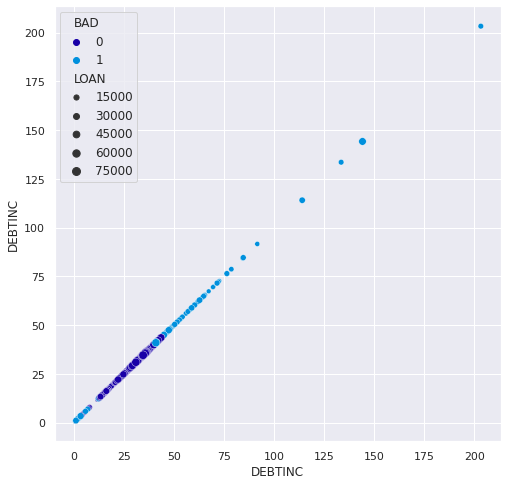

In [ ]:
plt.figure(figsize = (8, 8))

sns.scatterplot(data = data,

           x = 'DEBTINC',

           y = 'DEBTINC',

           hue = 'BAD',

           size = 'LOAN')

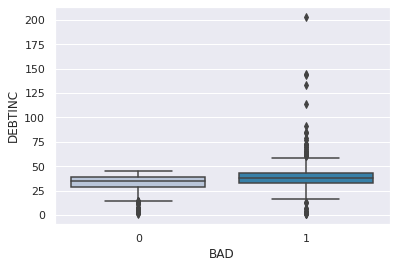

In [ ]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

0 = paid | 1 = unpaid

Based on the debt-to-income ratio:
1. Most defaulted clients have either extremely low debt-to-income and debt-to-income level more than 34.
2. Most defaluted clients also have small amount of loans

Thus, to mazimize profit:
1. Considering prioritize clients with debt-to-income level betweeen 20 - 34
2. The amount of loans should not be to small

**I suspect that the "reason" and "loan amount request" could be other important variables - the retial banks might need to collect more data on this

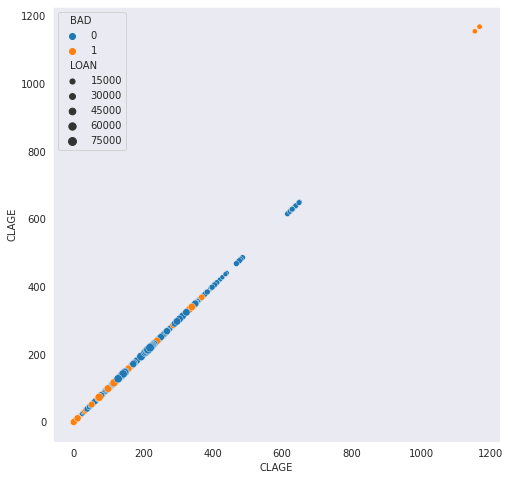

In [ ]:
plt.figure(figsize = (8, 8))

sns.scatterplot(data = data,

           x = 'CLAGE',

           y = 'CLAGE',

           hue = 'BAD',

           size = 'LOAN')

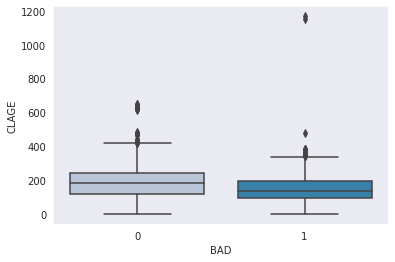

In [ ]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

Based on the CLAGE:

1. It seems like the clients with age of the oldest credit lines in months more than 200 are less likely to default on loans
2. There are some outliers

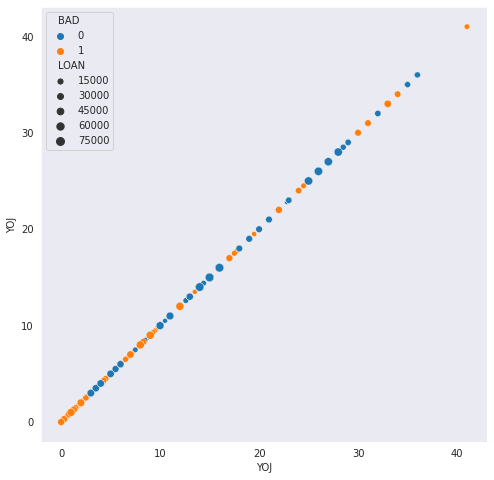

In [ ]:
plt.figure(figsize = (8, 8))

sns.scatterplot(data = data,

           x = 'YOJ',

           y = 'YOJ',

           hue = 'BAD',

           size = 'LOAN')

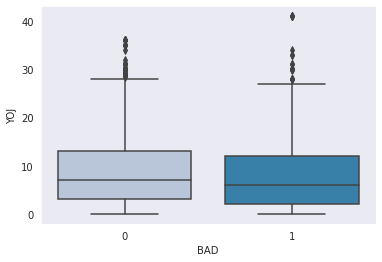

In [ ]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

Based on the YOJ:
1. it seems like the YOJ between 12 - 27 is the best range that most clients are not likely to default on loans

Thus, to maximize the profit:
1. The company could prioritize the clients with YOJ between 12 - 27

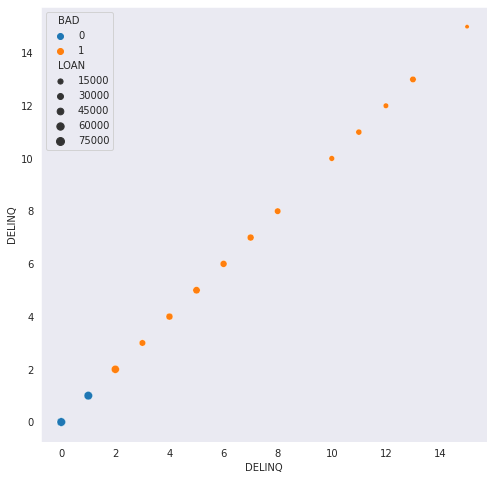

In [ ]:
plt.figure(figsize = (8, 8))

sns.scatterplot(data = data,

           x = 'DELINQ',

           y = 'DELINQ',

           hue = 'BAD',

           size = 'LOAN')

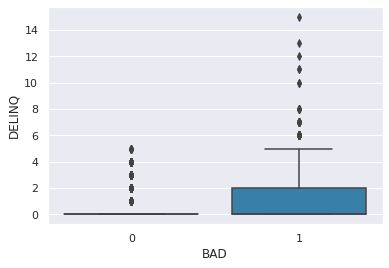

In [ ]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")

0 = paid | 1 = unpaid

Based on DELINQ:
1. The data clearly indicates that the clients with DELINQ less than 2 are more likely to repay their loan

Thus, to maximize the profits:
1. the retail banks can prioritize the clients will DELINQ less than 2
